In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve, \
average_precision_score
from inspect import signature

In [2]:
masterprojekt_daten = pd.read_csv("./Messergebnisse_merged.csv")
masterprojekt_daten = masterprojekt_daten.drop(columns=['Unnamed: 0', 'timeStamp'], axis=0)
#print(masterprojekt_daten.columns, masterprojekt_daten.dtypes)

#print(masterprojekt_daten.dtypes)

In [3]:
masterprojekt_daten

,Energy_Savings.Active_Power_Spindle,Energy_Savings.Active_Power_Z,Main_Spindle.Actual_Position_MCS,Main_Spindle.Actual_Power,Main_Spindle.Actual_Speed_Rate,Main_Spindle.MPC_Peak,Main_Spindle.MPC_Veff_Total,Main_Spindle.Temperature_Spindle,Tool_Control_Center.Axial_Force_Tension,Tool_Control_Center.Bending_Moment,...,Y1_Axis.Temperature_Y_Slide,Z1_Axis.Actual_Feed_Rate,Z1_Axis.Actual_Position_MCS,Z1_Axis.Actual_Power,Energy_Savings.Active_Power_X,Tool_Control_Center.Axial_Force_Compression,X1_Axis.Actual_Feed_Rate,X1_Axis.Actual_Position_MCS,A1_Axis.Actual_Power,Label
0,3.126359,53.527900,179.816218,0.500000,317.379310,1.000000,0.50,28.105000,1.258537,2.500000,...,24.765000,354.875000,-304.447544,13.739130,416.853000,0.052632,1011.666667,367.525,5.5,0
1,1.763218,-223.576625,184.350446,0.507463,317.500000,0.666667,0.50,28.067143,0.674074,0.850000,...,24.766667,8.800000,-302.581802,13.766667,416.853000,0.052632,1011.666667,367.525,5.5,0
2,1.398177,382.341625,181.430268,0.500000,317.300000,2.333333,0.50,28.067143,0.047826,0.478261,...,24.800000,-156.000000,-302.535946,12.562500,-60.904000,0.048148,3049.500000,384.030,5.5,0
3,1.065278,700.204571,177.692973,0.492308,317.128205,1.666667,1.00,28.032857,0.050000,0.500000,...,24.800000,26.000000,-303.418349,17.350000,-111.657000,0.054286,0.000000,397.960,5.5,0
4,0.225588,-132.687143,175.616696,0.508475,317.062500,1.500000,1.00,28.000000,0.050000,0.529412,...,24.800000,67.909091,-302.540270,16.608696,4.060500,0.052000,4358.500000,410.085,5.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,-16.873760,303.448700,180.035357,0.500000,951.461538,1.000000,0.75,27.290000,0.000000,0.500000,...,23.305000,-72.166667,-323.262222,13.600000,0.000000,0.150000,1185.000000,410.090,6.5,0
1373,-13.696250,627.496222,171.974828,0.500000,951.500000,1.600000,0.00,27.290000,0.000000,0.333333,...,23.308000,-9.666667,-323.293333,17.700000,-261.210000,0.150000,14.500000,425.330,6.5,1
1374,-15.487385,56.574333,189.220345,0.533333,951.500000,1.750000,0.80,27.290000,0.000000,0.666667,...,23.305000,249.333333,-319.254444,24.181818,16.692333,0.150000,1742.500000,433.260,6.5,0
1375,-16.962231,-276.777900,169.227931,0.500000,951.500000,0.500000,0.00,27.290000,0.000000,0.500000,...,23.305000,304.222222,-320.037857,26.875000,418.206500,0.150000,4252.000000,450.395,6.5,0


In [4]:
x = masterprojekt_daten.drop(columns=['Label'])
y = masterprojekt_daten['Label']

In [5]:
x.shape, y.shape

((1377, 22), (1377,))

In [6]:
X_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1432542)

In [7]:
correlation = masterprojekt_daten.corr()
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0, solver='lbfgs', max_iter=15000, multi_class='multinomial', C=0.3, verbose=1)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


0.8628519527702089

In [8]:
y_pred = regressor.predict(x_test)
y_probs = regressor.predict_proba(x_test)

In [9]:
print('Cross validation of the Data set: ', cross_val_score(regressor, x, y, verbose=3))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

C:\Users\MLDigitalLab\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.822, total=   2.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.455, total=   2.3s
[CV]  ................................................................
[CV] .................................... , score=0.686, total=   1.2s
Cross validation of the Data set:  [0.82173913 0.45533769 0.68558952]
Accuracy: 0.8478260869565217
Precision: 0.47619047619047616
Recall: 0.5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s finished


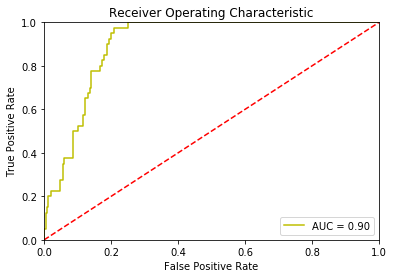

In [10]:
probabilities = y_probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.31')

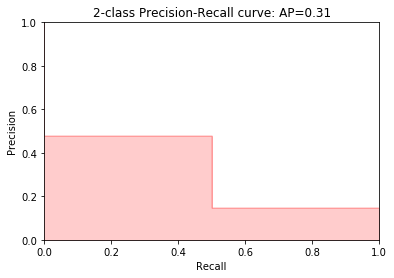

In [11]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

[Text(0, 0.5, 'i.O.'), Text(0, 1.5, 'n.I.O.')]

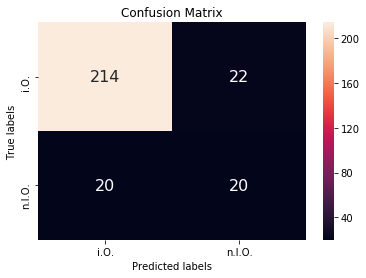

In [12]:
import sklearn
matrix = confusion_matrix(y_test, y_pred)
class_names = masterprojekt_daten.columns
ax = plt.subplot()

# plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot=True, fmt='d', ax = ax, annot_kws={"size": 16})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['i.O.', 'n.I.O.']); ax.yaxis.set_ticklabels(['i.O.', 'n.I.O.'])
#ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))

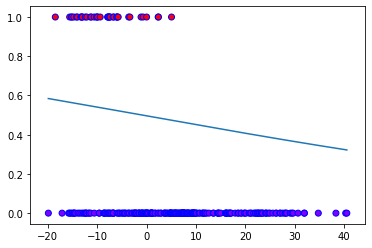

In [13]:
# loss = expit(x_test * regressor.coef_ + regressor.intercept_).ravel()
# plt.plot(x_test, loss, color='red', linewidth=3)

df_example = pd.DataFrame({'x': x_test.iloc[:,0], 'y': y_test})
df_example = df_example.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df_example['x'] * regressor.coef_[0][0] + regressor.intercept_[0]).ravel()
plt.plot(df_example['x'], sigmoid_function)
plt.scatter(df_example['x'], df_example['y'], c=df_example['y'], cmap='rainbow', edgecolors='b')